In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [5]:
iris_x, iris_y = datasets.load_iris(return_X_y = True, as_frame = True)
iris = iris_x.assign(target=iris_y)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
students = pd.read_csv("students_scores.csv")
students.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [7]:
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y = True, as_frame = True)
diabetes = diabetes_x.assign(target=diabetes_y)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
students = pd.read_csv("students_scores.csv")
students

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
30636,995,male,group C,some high school,standard,none,56,47,51
30637,996,male,group E,associate's degree,free/reduced,none,74,75,72
30638,997,male,group C,some college,standard,none,36,29,27
30639,998,male,group A,some high school,free/reduced,completed,43,34,39


# Imputación de datos con Knn

<div>
    <br>
    <img src="knn.png" width="500"/>
    <br>
</div>

In [14]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

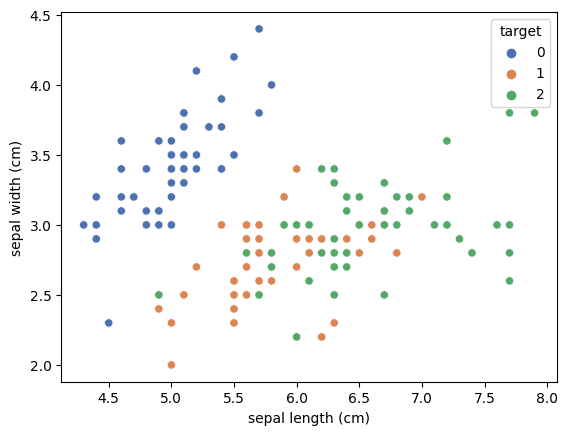

In [25]:
fig = plt.figure()
sns.scatterplot(data=iris, x="sepal length (cm)", y="sepal width (cm)", hue="target", palette="deep")

In [98]:
nan_array = np.random.random(iris.shape)<0
nan_array.T[0] = np.random.random(iris.shape[0])<0.1
iris_nan = iris.mask(nan_array)
iris_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  130 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [104]:
nan_values = iris_nan[iris_nan["sepal length (cm)"].isnull()]
nan_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,NaN,3.5,1.4,0.2,0
11,NaN,3.4,1.6,0.2,0
13,NaN,3.0,1.1,0.1,0
20,NaN,3.4,1.7,0.2,0
29,NaN,3.2,1.6,0.2,0
33,NaN,4.2,1.4,0.2,0
38,NaN,3.0,1.3,0.2,0
39,NaN,3.4,1.5,0.2,0
46,NaN,3.8,1.6,0.2,0
59,NaN,2.7,3.9,1.4,1


In [111]:
KNeighborsRegressor()
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X=iris_nan[iris_nan["sepal length (cm)"].notnull()].drop("sepal length (cm)", axis=1), y=iris_nan[iris_nan["sepal length (cm)"].notnull()]["sepal length (cm)"])
knn.score(X=iris_nan[iris_nan["sepal length (cm)"].notnull()].drop("sepal length (cm)", axis=1), y=iris_nan[iris_nan["sepal length (cm)"].notnull()]["sepal length (cm)"])

0.9286168712222667

In [106]:
iris_nan["sepal length (cm)"] = iris_nan["sepal length (cm)"].fillna(pd.Series(knn.predict(nan_values.drop("sepal length (cm)", axis=1)), index=nan_values.index))

In [108]:
iris_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


[]

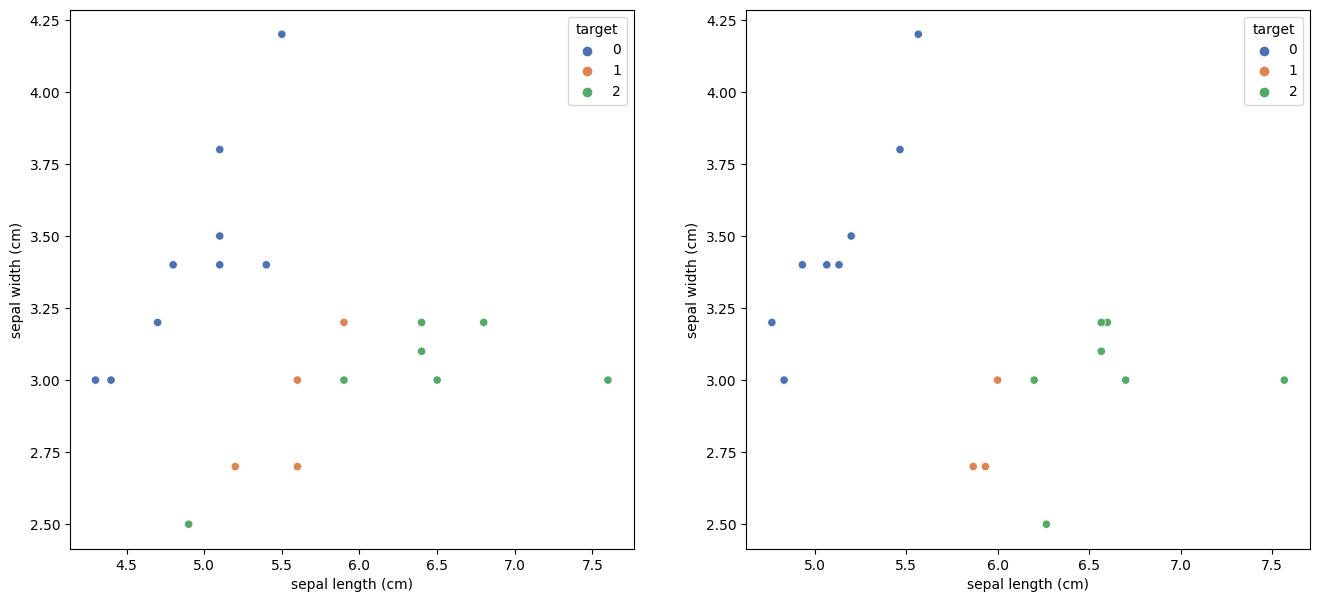

In [122]:
fig, axs = plt.subplots(1,2,figsize=(16,7))
sns.scatterplot(data=iris.filter(items=nan_values.index,axis=0), x="sepal length (cm)", y="sepal width (cm)", hue="target", palette="deep", ax=axs[0])
sns.scatterplot(data=iris_nan.filter(items=nan_values.index,axis=0), x="sepal length (cm)", y="sepal width (cm)", hue="target", palette="deep", ax=axs[1])
plt.plot()

# Conversion de datos categoricos

In [191]:
students.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


## Conversion de datos categoricos a numericos por valores unicos

In [196]:
unique_values = students['EthnicGroup'].unique()
students['EthnicGroup'].replace(unique_values,range(unique_values.shape[0]), inplace=False)

0        0
1        1
2        0
3        2
4        1
        ..
30636    1
30637    4
30638    1
30639    2
30640    3
Name: EthnicGroup, Length: 30641, dtype: int64

## Conversion de datos categoricos a numericos por codificacion de bernoulli

In [159]:
pd.get_dummies(students['Gender'])

,female,male
0,True,False
1,True,False
2,True,False
3,False,True
4,False,True
...,...,...
30636,False,True
30637,False,True
30638,False,True
30639,False,True


# Reduccion de dimensionalidad con PCA Y LDA
## LDA
<div>
    <br>
    <img src="pca.png" width="500"/>
    <br>
</div>

In [150]:
from sklearn.decomposition import PCA

In [151]:
pca = PCA(n_components=2)
iris_pca = pd.DataFrame(pca.fit_transform(iris.drop("target",axis=1)))
iris_pca

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


<AxesSubplot: xlabel='0', ylabel='1'>

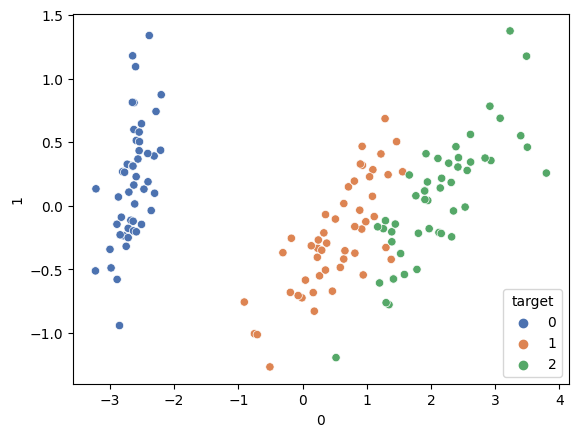

In [152]:
fig = plt.figure()
sns.scatterplot(data=iris_pca, x=0, y=1, hue=iris["target"], palette="deep")

## LDA

<div>
    <br>
    <img src="lda.png" width="500"/>
    <br>
</div>

In [175]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [187]:
lda = LinearDiscriminantAnalysis(n_components=1)
iris_lda = pd.DataFrame(lda.fit_transform(iris.drop("target",axis=1), iris["target"]))
iris_lda

,0
0,8.061800
1,7.128688
2,7.489828
3,6.813201
4,8.132309
...,...
145,-5.645003
146,-5.179565
147,-4.967741
148,-5.886145


<AxesSubplot: xlabel='0'>

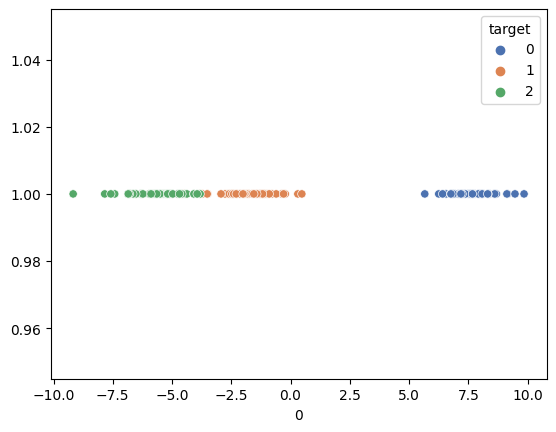

In [188]:
fig = plt.figure()
sns.scatterplot(data=iris_lda, x=0, y=1, hue=iris["target"], palette="deep")

<AxesSubplot: >

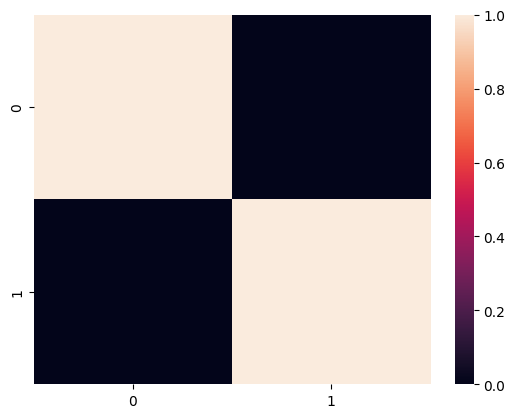

In [181]:
fig = plt.figure()
sns.heatmap(data=iris_pca.corr())